In [1]:
!pip install PyDrive

In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')

In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json
import time
import re
import numpy as np

In [4]:
Total_tweet=0
tweet_time=[]
location=[]
temp_location=[]
tweet=[]
temp_tweet=[]
binary_value=[]

# Patriots and Seahawks Cities
# fan_locations = np.array(['.* Ak.*', '.* AK.*', '.* Anchorage.*', '.*Alaska.*', '.* Juneau.*',
#                         '.* Fairbanks.*', '.* Washington.*', '.* WA.*', '.* ,WA.*'
#                         '.* Seattle.*', '.* Olympia, WA.*', '.* Tacoma.*', '.* Kirkland, WA.*',
#                         '.* Bellevue, WA.*', '.* Redmond, WA.*', '.* Spokane, WA.*', '.* Richland, WA.*',
#                         '.* Kent, WA.*', '.* Federal Way, WA.*', '.* Portland.*', '.* Salem, OR.*', 
#                         '.* Eugene, OR.*', '.* Salem, OR.*', '.* Beaverton, OR.*', '.* Gresham, OR.*', 
#                         '.* Boise, ID.*', '.* Grangeville, ID.*', '.* Kalispell, ID.*', '.* Evergreen.*',
#                         '.* Kalispell, MT.*', '.* Evergreen, MT.*', '.* Columbia Falls, MT.*', '.* Eureka, MT.*',
#                         '.* Boston.*', '.* MA .*', '.* Mass.*', '.* Ma.*', '.* Worcester.*', '.* Newton, MA.*', 
#                         '.* Cambridge, MA.*', '.* Springfield, MA.*', '.* Providence.*', '.* Rhode Island.*', '.* RI.*', 
#                         '.* Hartford, CT.*', '.* New Britain, CT.*', '.* Middletown, CT.*', '.* West Hartford, CT.*','.* Concord, NH.*',
#                         '.* New Hampshire.*', '.* NH.*', '.* Vermont.*', '.* VT.*', '.* Maine.*', '.* ME .*']) 

fan_location_1 = np.array(['.* Washington.*', '.* WA .*', '.* ,WA .*', '.* , Wa .*','.* Seattle.*', '.* Olympia.*',                         
                        '.* Spokane, WA.*', '.* Richland, WA.*', '.* Tacoma.*', '.* Kirkland.*'])  
fan_location_2 = np.array(['.* Boston.*', '.* MA .*', '.* Mass.*', '.* Ma .*', '.* Worcester.*', '.* Cambridge.*', '.* New England.*', 
                          '.* Framingham, MA.*', '.* Newton, MA.*', '.* Springfield, MA.*'])
                        
# Not Washington, D.C.
not_WashDC = np.array(['.* D.C..*', '.* Washington, DC.*', '.* DC.*'])

with open('./ECE219_tweet_data/tweets_#superbowl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    temp_location = json_object['tweet']['user']['location']
    temp_tweet = json_object['tweet']['text']
    
    for i in range(len(fan_location_1)):
      # Washington 
      if re.match(fan_location_1[i], temp_location) and not re.match(not_WashDC[0], temp_location) and not re.match(not_WashDC[1], temp_location) and not re.match(not_WashDC[2], temp_location):
        location.append(temp_location)
        tweet.append(temp_tweet)
        binary_value.append(1)
        break
        
      # Massachusetts
      elif re.match(fan_location_2[i], temp_location) and not re.match(not_WashDC[0], temp_location) and not re.match(not_WashDC[1], temp_location) and not re.match(not_WashDC[2], temp_location):
        location.append(temp_location)
        tweet.append(temp_tweet)
        binary_value.append(0)
        break
    
#     if re.match('.* MA .*',temp_location) or re.match('.* Mass.*', temp_location) or re.match('.* Boston.*', temp_location):
#       location.append(temp_location)
# #     temp_location = json_object['tweet']['user']['location']
# #     location.append()

f.closed

True

In [0]:
# len(fan_locations)

In [7]:
print('tweet length', len(tweet))
print('location length', len(location))

tweet length 7464
location length 7464


In [8]:
len(tweet)

7464

In [9]:
tweet

["@DougBaldwinJr just this #mediocre #SuperBowlChampion wide receiver #GoHawks #RePete http://t.co/HUwZhG6JwQ's video http://t.co/wE4PP5YaHd",
 "Just a #SuperBowlChampion  #Pedestrian wide receiver #GoHawks #RePete http://t.co/HUwZhG6JwQ's video http://t.co/XYQxeG6u6k",
 'No offense Katy Perry but we hope this is a JOKE!!! http://t.co/vn3HlJaOCR #SB2015 #halftimesuperbowl #KatyPerry #SuperBowlXLIX',
 'Completely OK with being called an insufferable win-againner\n\n#12s #GoHawks #seahawks #NFLPlayoffs #SuperBowlXLIX #repete [sic]',
 '#gjpizzaparty #Seattle #Seahawks #superbowl2015 @garlicjim #bestpizzaonthewestcoast',
 'Today is the 48th anniversary of the first Super Bowl. Attendance was 61,946 - about 30k short of capacity. GB 35 KC 10. #SuperBowlXLIX',
 'New display for the #SuperBowlXLIX http://t.co/uHKL8J4BtZ',
 "We'll be offering platters to-go for #SuperBowlXLIX. How bout an entire tray of Boundary Mac N' Cheese for your party? Stay tuned for deats!",
 'Electric @BMW #auto to app

In [10]:
df = pd.DataFrame({
    'tweet' : tweet,
    'location' : location,
    'binary value' : binary_value
}, columns = ['tweet', 'location', 'binary value'])

display(df)

,tweet,location,binary value
0,@DougBaldwinJr just this #mediocre #SuperBowlC...,"West Seattle, Wa",1
1,Just a #SuperBowlChampion #Pedestrian wide re...,"West Seattle, Wa",1
2,No offense Katy Perry but we hope this is a JO...,"Spokane, Washington",1
3,Completely OK with being called an insufferabl...,"In the Moment, Washington",1
4,#gjpizzaparty #Seattle #Seahawks #superbowl201...,"Seattle, Washington",1
5,Today is the 48th anniversary of the first Sup...,"Seattle, WA USA",1
6,New display for the #SuperBowlXLIX http://t.co...,All over MA & CT,0
7,We'll be offering platters to-go for #SuperBow...,"Bellingham, Washington USA",1
8,Electric @BMW #auto to appear in 60-second spo...,"Chicago, Beverly, Mass.",0
9,Crocheted him a new hat! #GoHawks #Seahawks #S...,"Bothell, Washington",1


In [11]:
print('len X_train', len(X_train))
print('len X_test', len(X_test))
print('len y_train', len(y_train))
#  Tweet Data training and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweet, binary_value, test_size=0.1, random_state=42)print('len y_test', len(y_test))

SyntaxError: ignored

In [12]:
#  Tweet Data training and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweet, binary_value, test_size=0.1, random_state=42)

# tweet textual content classification

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import sklearn 
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot  as plt
import random
from nltk import pos_tag
import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

stop_words_skt = text.ENGLISH_STOP_WORDS


stop_words_en = stopwords.words('english')

combined_stopwords = set.union(set(stop_words_en),set(punctuation))

wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def rmv_punc(doc):
  return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords )

# remove english stopwords and punctuation 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

analyzer = CountVectorizer().build_analyzer()

def trimWordNumber(list_word):
  myword=[range(len(list_word))]
  for i in range(len(list_word)):
    temp = re.findall('[a-zA-Z]+', list_word[i])
    list_word[i]= " ".join(temp)

# training tweet TF-IDF matrix  
# trimWordNumber(X_train)
vectorizer= CountVectorizer(min_df=3, stop_words='english', analyzer=rmv_punc)
vectTemp= vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(vectTemp)

# testing tweet TF-IDF matrix
# trimWordNumber(X_test)
X_test_tfidf = vectorizer.transform(X_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
X_train_tfidf.data

array([0.12338334, 0.28464925, 0.23616564, ..., 0.16292428, 0.11467008,
       0.11382516])

In [14]:
len(X_train_tfidf.data)

50918

In [15]:
X_train_tfidf.data[0:10]

array([0.12338334, 0.28464925, 0.23616564, 0.65114405, 0.65114405,
       0.16611437, 0.49608973, 0.29274206, 0.206039  , 0.20452084])

In [16]:
X_test_tfidf.data[0:10]

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
y_test[0:10]

[1, 1, 0, 0, 0, 1, 1, 1, 0, 1]

In [18]:
np.max(X_test_tfidf.data)

12

In [19]:
X_test_tfidf.data

array([1, 2, 1, ..., 1, 1, 1])

In [0]:
# LSA/LSI 
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)

X_train_reduced = svd.fit_transform(X_train_tfidf)

X_test_reduced= svd.transform(X_test_tfidf)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.pipeline import Pipeline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe
from sklearn.pipeline import Pipeline

[[ 1.26597013e-01 -6.37405819e-02  8.89710312e-02 ...  1.17408058e-02
  -5.84408805e-03  7.80943178e-03]
 [ 3.40167773e-01 -6.11189341e-02 -1.06156352e-01 ...  8.48333586e-03
   1.33966672e-02  1.24739005e-02]
 [ 1.21033501e-01 -2.14392606e-02  1.62784981e-01 ...  8.54145284e-04
  -2.80258025e-05 -3.51075609e-02]
 ...
 [ 3.66478086e-02 -2.88234926e-02  4.06616835e-02 ...  2.34361559e-02
   2.69141796e-02  1.28685261e-02]
 [ 3.28849423e-01 -1.02224643e-01  1.07484924e-01 ...  4.20164144e-02
  -2.24479322e-02  2.21976287e-02]
 [ 2.12923420e-01 -4.05686946e-02 -6.13594983e-02 ... -3.09930220e-02
  -1.67376994e-02  3.26002065e-03]]
Confusion matrix, without normalization
[[339  64]
 [114 230]]
accuracy 76.17135207496653
Precision score: 0.6686046511627907
recall score: 0.782312925170068
f1 score: 0.7210031347962382


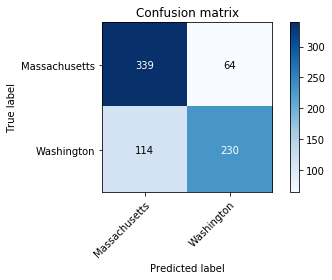

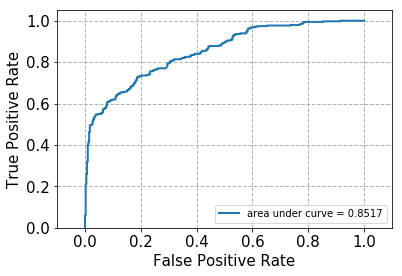

In [37]:
clf = SVC(kernel='linear',C=1000)
clf.fit(X_train_reduced, y_train)
print(X_train_reduced)
testpredict=clf.predict(X_test_reduced)
# print(testpredict)

clf.score(X_test_reduced, y_test)

myclass=np.array(['Massachusetts' ,'Washington'])


plot_confusion_matrix(y_test,clf.predict(X_test_reduced) ,classes=myclass, title='Confusion matrix')
print("accuracy", clf.score(X_test_reduced, y_test)*100)
print("Precision score:",precision_score(clf.predict(X_test_reduced), y_test))
print("recall score:", recall_score(clf.predict(X_test_reduced), y_test))
print("f1 score:", f1_score(clf.predict(X_test_reduced), y_test))

pipeline1 = Pipeline([
    ('clf', SVC(kernel='linear',C=1000)),
])
fit_predict_and_plot_roc(pipeline1, X_train_reduced, y_train, X_test_reduced, y_test)

[0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 

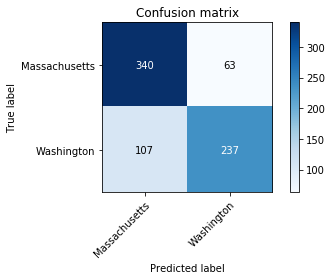

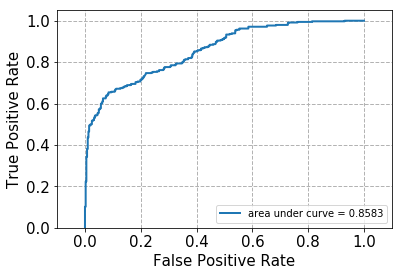

In [23]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
myclass=np.array(['Massachusetts' ,'Washington'])
clfL= LogisticRegression(random_state=0, solver='lbfgs', C= np.Inf,max_iter=10000, multi_class='multinomial').fit(X_train_reduced, y_train)

testpredict=clfL.predict(X_test_reduced)
print(testpredict)

print("Accuracy", clfL.score(X_test_reduced, y_test)*100)
print("Precision score:",precision_score(clfL.predict(X_test_reduced), y_test))
print("recall score:", recall_score(clfL.predict(X_test_reduced), y_test))
print("f1 score:", f1_score(clfL.predict(X_test_reduced), y_test))
plot_confusion_matrix(y_test,clfL.predict(X_test_reduced) ,classes=myclass, title='Confusion matrix')

pipeline1 = Pipeline([
    ('clf', LogisticRegression(random_state=0, solver='lbfgs', C= np.Inf,max_iter=10000, multi_class='multinomial'))
])
fit_predict_and_plot_roc(pipeline1, X_train_reduced, y_train, X_test_reduced, y_test)

In [0]:
# Naive Bayes GuassianNB Classifier

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)

X_test_reduced= svd.transform(X_test_tfidf)


# print(X_train_reduced.shape)
# print(X_test_reduced.shape)
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
W_train = model.fit_transform(X_train_tfidf)
# print(X_train_tfidf.shape)
# print(X_test_tfidf.shape)

# modelTest = NMF(n_components=50, init='random', random_state=0)
W_test= model.transform(X_test_tfidf)


# print(W_train.shape)
# print(model.components_.shape)
# print(svd.components_.shape)
# print("||X-WH||^2=",np.sum(np.array(X_train_tfidf - W_train.dot(model.components_))**2))

# print(svd.explained_variance_)
USV= X_train_reduced.dot(svd.components_)

Accuracy 73.89558232931726
Precision score: 0.6918604651162791
recall score: 0.72782874617737
f1 score: 0.7093889716840537
Confusion matrix, without normalization
[[314  89]
 [106 238]]


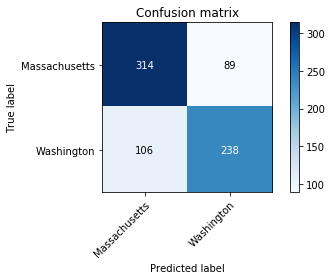

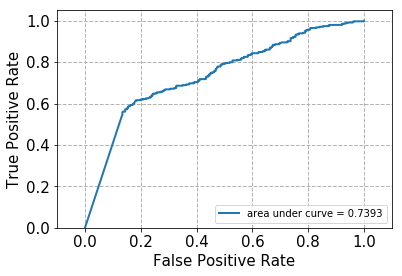

In [25]:
# Naive Bayes GuassianNB Classifier

from sklearn.naive_bayes import GaussianNB
myclass=np.array(['Massachusetts' ,'Washington'])
gnb = GaussianNB().fit(W_train, y_train)

print("Accuracy", gnb.score(W_test, y_test)*100)
print("Precision score:",precision_score(gnb.predict(W_test), y_test))
print("recall score:", recall_score(gnb.predict(W_test), y_test))
print("f1 score:", f1_score(gnb.predict(W_test), y_test))
plot_confusion_matrix(y_test,gnb.predict(W_test) ,classes=myclass, title='Confusion matrix')

pipeline1 = Pipeline([
    ('clf', GaussianNB())
])
fit_predict_and_plot_roc(pipeline1, X_train_reduced, y_train, X_test_reduced, y_test)

In [0]:
# from sklearn.neural_network import MLPRegressor


# # print(X_train_reduced[0:30])
# # print(X_test_reduced[0:30])
# model= MLPRegressor((100,100,100,100),max_iter=10000)

# model.fit(X_train_reduced, y_train)

# # print(X_train[0:30])

# # print(y_train)


# testpredict=model.predict(X_test_reduced)
# # print(testpredict)
# my_prediction=[]
# for element in testpredict:
#   if element >=0:
#     my_prediction.append(1)
#   else:
    
#     my_prediction.append(0)
    
# model.score(X_test_reduced, y_test)

# # myclass=np.array(['Massachusetts' ,'Washington'])
# # model.predict(X_test_reduced)

# plot_confusion_matrix(y_test,my_prediction ,classes=myclass, title='Confusion matrix')
# print("accuracy", model.score(X_test_reduced, my_prediction)*100)
# print("Precision score:",precision_score(my_prediction, y_test))
# print("recall score:", recall_score(my_prediction, y_test))
# print("f1 score:", f1_score(my_prediction, y_test))

# pipeline1 = Pipeline([
#     ('model', MLPRegressor((10,10,10,10),max_iter=10000)),
# ])
# fit_predict_and_plot_roc(pipeline1, X_train_reduced, y_train, X_test_reduced, y_test)

In [26]:
# tweet textual content classification

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import sklearn 
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot  as plt
import random
from nltk import pos_tag
import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
import re
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()


stop_words_skt = text.ENGLISH_STOP_WORDS


stop_words_en = stopwords.words('english')